<a href="https://colab.research.google.com/github/Ranjani94/Deep_Learning/blob/master/Graded_Assignment_3/graded_assign_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Planet: Understanding the Amazon deforestation from Space

In [38]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Deep_Learning/'

Mounted at /content/gdrive


In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

import cv2

###Importing Required Libraries

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [0]:
csv_train = base_dir + '/Planet_Amazon_dataset/train_v2.csv'
csv_test = base_dir + '/Planet_Amazon_dataset/test_v2_file_mapping.csv'

###Extracting images from tar file and saving in Google drive

In [0]:
# !tar -xvf  '/content/gdrive/My Drive/Deep_Learning/Planet_Amazon_dataset/train-jpg.tar' -C '/content/gdrive/My Drive/Deep_Learning/Planet_Amazon_dataset/train-jpg'

In [0]:
# !tar -xvf  '/content/gdrive/My Drive/Deep_Learning/Planet_Amazon_dataset/test-jpg.tar' -C '/content/gdrive/My Drive/Deep_Learning/Planet_Amazon_dataset/test-jpg'

In [44]:
df_train = pd.read_csv(csv_train)
df_train.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [45]:
# Print all unique tags
from itertools import chain
labels_list = list(chain.from_iterable([tags.split(" ") for tags in df_train['tags'].values]))
labels_set = set(labels_list)
print("There is {} unique labels including {}".format(len(labels_set), labels_set))

There is 17 unique labels including {'slash_burn', 'cloudy', 'agriculture', 'bare_ground', 'primary', 'conventional_mine', 'selective_logging', 'blow_down', 'habitation', 'cultivation', 'road', 'partly_cloudy', 'blooming', 'artisinal_mine', 'haze', 'clear', 'water'}


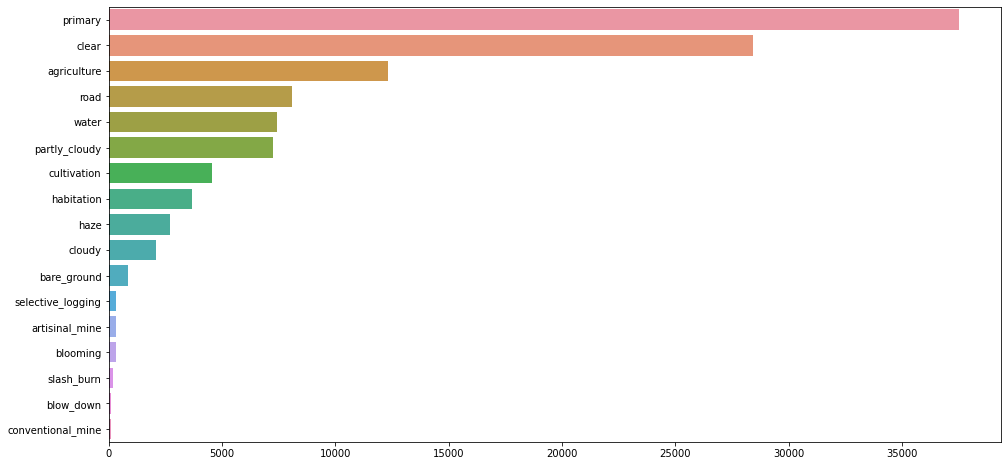

In [46]:
# Histogram of label instances
labels_s = pd.Series(labels_list).value_counts() # To sort them by count
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=labels_s, y=labels_s.index, orient='h')

###Merging CSV file labels with the corresponding images

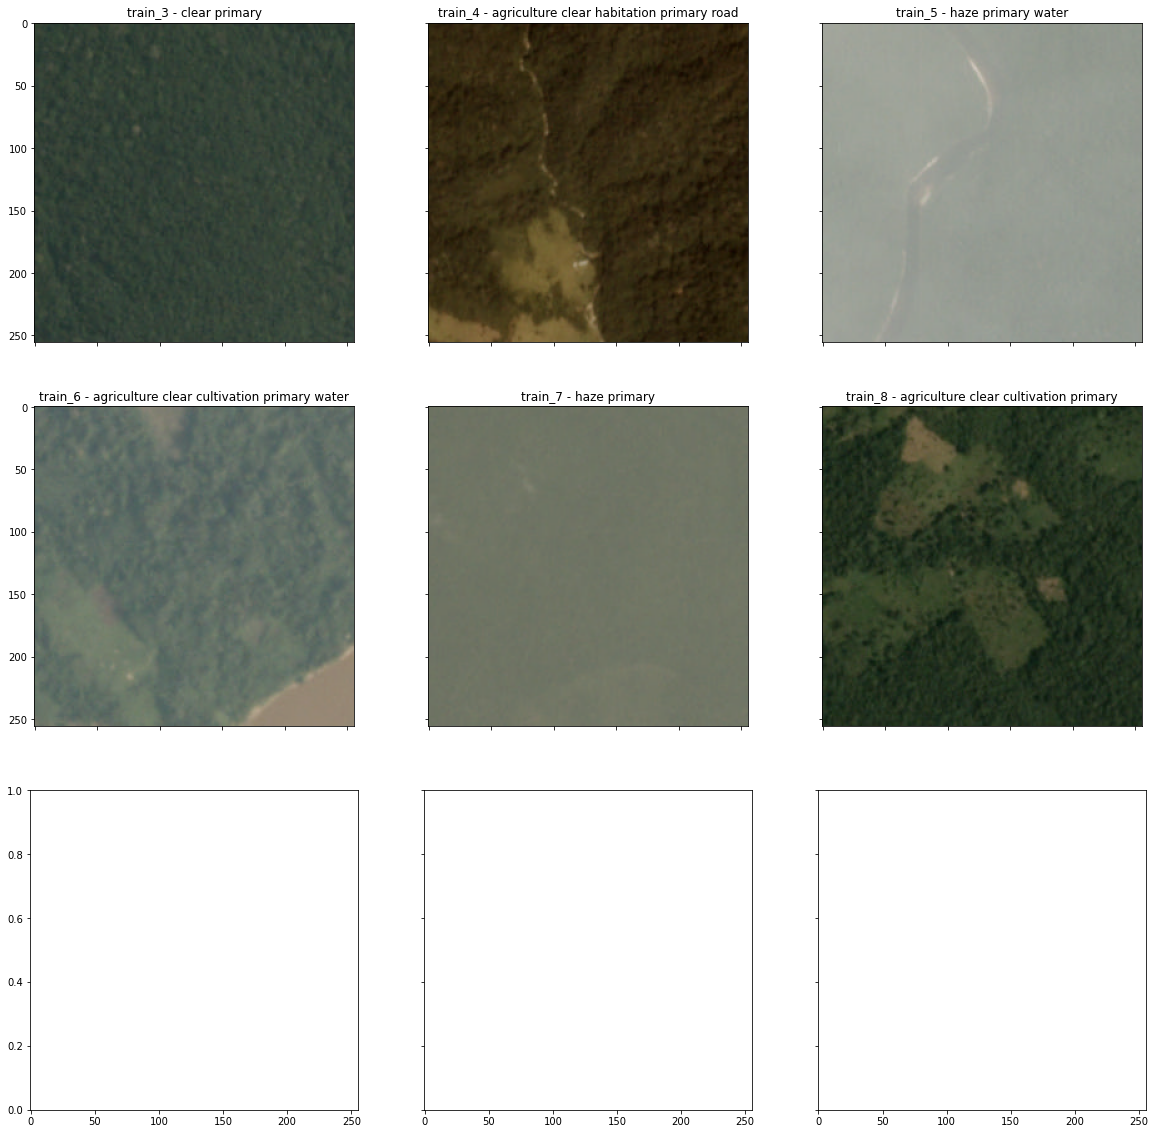

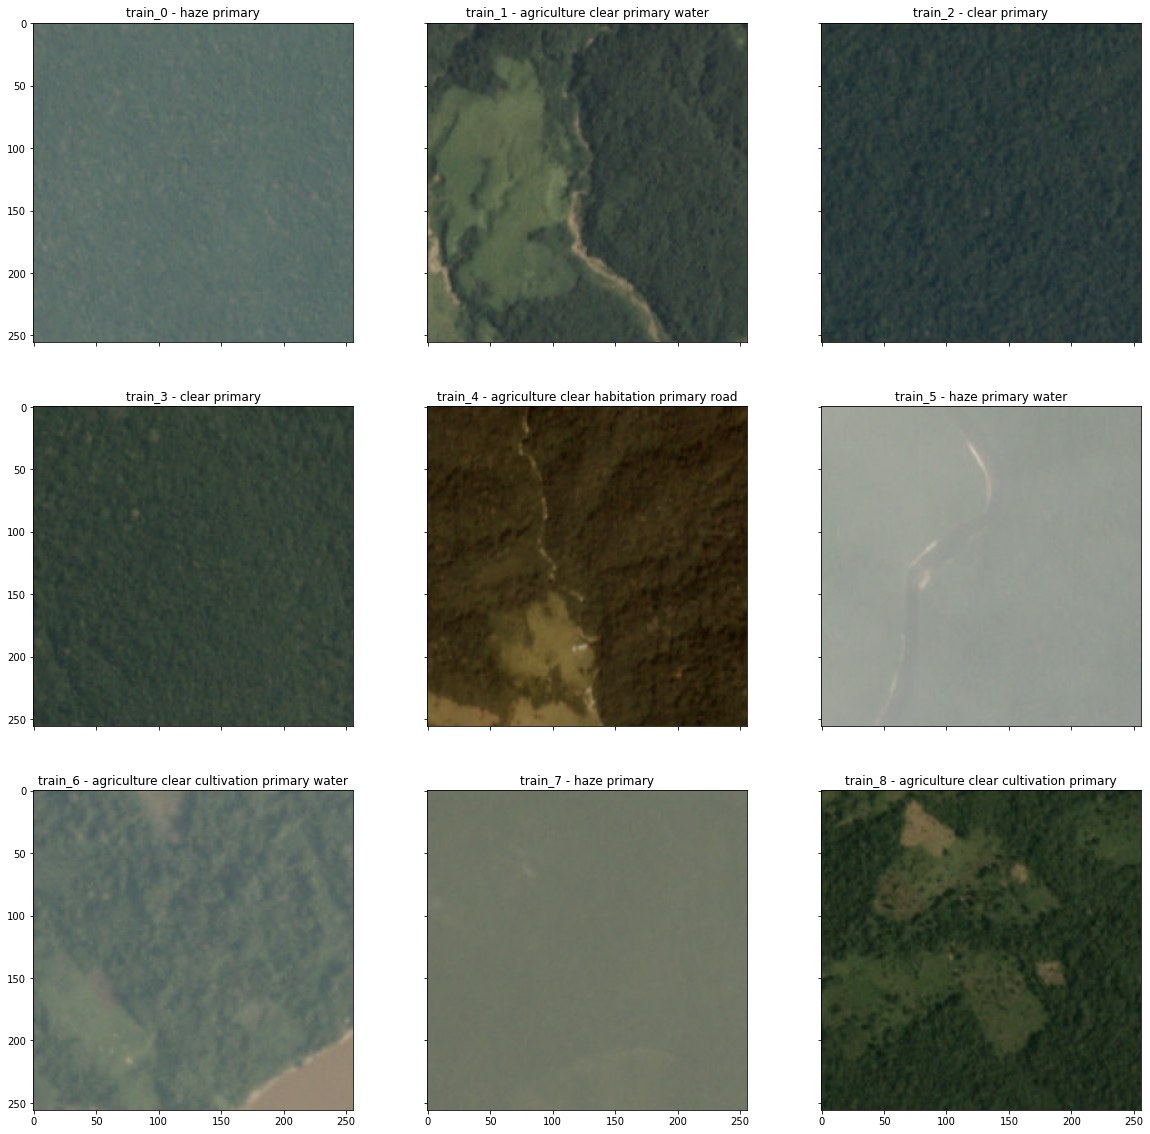

In [47]:
import cv2

new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))
i = 0
for f, l in df_train[:9].values:
  try:
    img = cv2.imread('/content/gdrive/My Drive/Deep_Learning/Planet_Amazon_dataset/train-jpg/train-jpg/{}.jpg'.format(f))
    ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i // 3, i % 3].set_title('{} - {}'.format(f, l))
    #ax[i // 4, i % 4].show()
    i += 1
  except:
    continue
    
plt.show()

###Image Preprocessing

In [0]:
img_resize = (128, 128) # The resize size of each image ex: (64, 64) or None to use the default image size
validation_split_size = 0.2

In [0]:
# img.shape

In [0]:
def flatten(l):
    result = []
    for sublist in l:     
        for item in sublist: 
            result.append(item)
    return result

In [0]:
from tqdm import tqdm

In [0]:
labs = list(set(flatten([l.split(' ') for l in df_train['tags'].values])))

In [0]:
label_map = {l: i for i, l in enumerate(labs)}

In [0]:
x_train=[]
y_train=[]

In [60]:
for f, tags in tqdm(df_train.values, miniters=5000):
    img = cv2.imread('/content/gdrive/My Drive/Deep_Learning/Planet_Amazon_dataset/train-jpg/train-jpg/{}.jpg'.format(f))
    targets = np.zeros(17)
    for t in tags.split(' '):
        targets[label_map[t]] = 1 
    x_train.append(cv2.resize(img, (32, 32)))
    y_train.append(targets)
    
y_train = np.array(y_train, np.uint8)
x_train = np.array(x_train, np.float16) / 255.

Streaming output truncated to the last 5000 lines.
 98%|█████████▊| 39646/40479 [3:51:20<04:19,  3.22it/s]





 98%|█████████▊| 39647/40479 [3:51:20<04:10,  3.31it/s]





 98%|█████████▊| 39648/40479 [3:51:20<03:50,  3.60it/s]





 98%|█████████▊| 39649/40479 [3:51:21<03:28,  3.99it/s]





 98%|█████████▊| 39650/40479 [3:51:21<03:13,  4.28it/s]





 98%|█████████▊| 39651/40479 [3:51:21<03:28,  3.96it/s]





 98%|█████████▊| 39652/40479 [3:51:21<03:16,  4.21it/s]





 98%|█████████▊| 39653/40479 [3:51:22<04:17,  3.21it/s]





 98%|█████████▊| 39654/40479 [3:51:22<04:17,  3.20it/s]





 98%|█████████▊| 39655/40479 [3:51:22<04:14,  3.24it/s]





 98%|█████████▊| 39656/40479 [3:51:23<04:03,  3.38it/s]





 98%|█████████▊| 39657/40479 [3:51:23<04:33,  3.01it/s]





 98%|█████████▊| 39658/40479 [3:51:23<04:22,  3.12it/s]





 98%|█████████▊| 39659/40479 [3:51:24<04:02,  3.38it/s]





 98%|█████████▊| 39660/40479 [3:51:24<04:08,  3.29it/s]





 98%|█████████▊| 39661/40479 [3:51

In [0]:
# y_train = np.array(y_train, np.uint8)
# x_train = np.array(x_train, np.float16) / 255.

In [61]:
print(x_train.shape)

(41742, 32, 32, 3)


In [62]:
y_train.shape

(41742, 17)

In [0]:
split = 35000
x_train, x_valid, y_train, y_valid = x_train[:split], x_train[split:], y_train[:split], y_train[split:]

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [0]:
from keras.callbacks import TensorBoard

import tensorflow as tf
import datetime

In [0]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [0]:

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1)

In [71]:
%tensorboard --logdir fit

UsageError: Line magic function `%tensorboard` not found.


In [72]:
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(x_valid, y_valid),callbacks=[tensorboard_callback])

Epoch 1/5
274/274 [==============================] - 116s 423ms/step - loss: 0.2488 - accuracy: 0.5859 - val_loss: 0.2036 - val_accuracy: 0.6259
Epoch 2/5
274/274 [==============================] - 115s 418ms/step - loss: 0.2023 - accuracy: 0.6199 - val_loss: 0.1919 - val_accuracy: 0.6253
Epoch 3/5
274/274 [==============================] - 117s 427ms/step - loss: 0.1884 - accuracy: 0.6167 - val_loss: 0.1722 - val_accuracy: 0.6203
Epoch 4/5
274/274 [==============================] - 115s 419ms/step - loss: 0.1804 - accuracy: 0.6115 - val_loss: 0.1716 - val_accuracy: 0.6241
Epoch 5/5
274/274 [==============================] - 114s 416ms/step - loss: 0.1758 - accuracy: 0.6028 - val_loss: 0.1616 - val_accuracy: 0.6178


###Fine Tuning the model and trying out various hyperparamaters

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(17, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [77]:
history1 = model.fit(x_train, y_train,
          batch_size=256,
          epochs=3,
          verbose=1,
          validation_data=(x_valid, y_valid),callbacks=[tensorboard_callback])

Epoch 1/3
137/137 [==============================] - 172s 1s/step - loss: 0.4856 - accuracy: 0.2857 - val_loss: 0.3174 - val_accuracy: 0.6132
Epoch 2/3
137/137 [==============================] - 173s 1s/step - loss: 0.3593 - accuracy: 0.5019 - val_loss: 0.2960 - val_accuracy: 0.6132
Epoch 3/3
137/137 [==============================] - 172s 1s/step - loss: 0.3384 - accuracy: 0.5303 - val_loss: 0.2864 - val_accuracy: 0.6132


###Tensorboard Integration

In [73]:
pip install -U tensorboard

Requirement already up-to-date: tensorboard in /usr/local/lib/python3.6/dist-packages (2.2.1)


In [74]:
!tensorboard dev upload --logdir logs \
  --name "Planet Amazon Dataset" \
  --description "Training results from Plant amazon dataset"

2020-05-06 22:12:43.920357: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scop

In [0]:
# prediction_valid = model.predict(x_valid, batch_size=128)

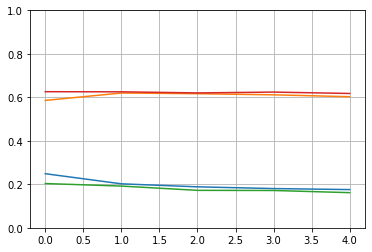

In [78]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

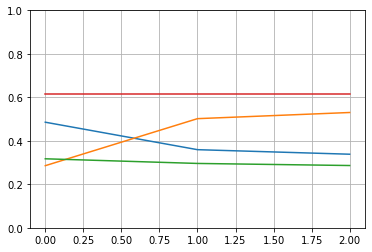

In [81]:
plt.plot(pd.DataFrame(history1.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()